In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
from deepforest import main
from deepforest import get_data

D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
def delete_all_unused_data(path, extension='tfw'):
    allfile = os.listdir(path)
    for i in range(len(allfile)):
        if extension in allfile[i]:
            os.remove((path + "\\" + allfile[i]))

In [4]:
delete_all_unused_data(r'C:\Users\ASUS\Desktop\DeepForest\Monas\Newest\images')

In [5]:
import os
def rename_python(path, extension='jpg'):
    allfile = os.listdir(path)
    for i in range(len(allfile)):
        os.rename((path + "\\" + allfile[i]), (path + "\\" + "tree-counting-"+str(i+1) + "." + extension)) 

In [6]:
rename_python(r'C:\Users\ASUS\Desktop\DeepForest\Monas\Newest\images', extension='tif')
rename_python(r'C:\Users\ASUS\Desktop\DeepForest\Monas\Newest\labels', extension='xml')

In [10]:
import os
import pandas as pd
from deepforest import get_data
from deepforest import utilities
def get_all_data(path):
    allfile = os.listdir(path)
    annot = get_data(path + "\\" + allfile[0])
    annotate = utilities.xml_to_annotations(annot)
    length = len(allfile)
    for i in range(1, length):
        annot2 = get_data(path+"\\"+allfile[i])
        annotate2 = utilities.xml_to_annotations(annot2)
        annotate = annotate.append(annotate2)
        
    return annotate

In [11]:
allAnnot = get_all_data(r'C:\Users\ASUS\Desktop\DeepForest\Monas\Newest\labels') 

AttributeError: 'DataFrame' object has no attribute 'append'

In [9]:
allAnnot

,image_path,xmin,ymin,xmax,ymax,label
0,000000000.tif,254,252,256,256,1
1,000000000.tif,213,243,236,256,1
2,000000000.tif,217,183,242,208,1
3,000000000.tif,197,231,217,251,1
4,000000000.tif,181,226,198,244,1
...,...,...,...,...,...,...
51,000000998.tif,212,136,229,152,1
52,000000998.tif,201,153,222,174,1
53,000000998.tif,184,152,203,171,1
54,000000998.tif,137,139,156,158,1


In [10]:
print(len(allAnnot))

180342


In [11]:
def formatting(table,extension='tif'):
    y = len(table)
    a = y // 10
    for (idx, path) in enumerate(table[['image_path'][0]]):
        if (idx % a == 0):
            print(str(idx) + ' / ' + str(y))
        temp = path.split('.')
        x = int(temp[0])
        allAnnot[['image_path']] = allAnnot[['image_path']].replace(path, (("tree-counting-"+str(x+1)+'.'+extension)))
    
    return allAnnot

In [12]:
def formattingLabel(table,extension='tif'):
    y = len(table)
    a = y // 10
    for (idx, path) in enumerate(table[['label'][0]]):
        if (idx % a == 0):
            print(str(idx) + ' / ' + str(y))
        allAnnot[['label']] = 'Tree'
    
    return allAnnot

In [13]:
newAnnot = formatting(allAnnot)

0 / 180342
18034 / 180342
36068 / 180342
54102 / 180342
72136 / 180342
90170 / 180342
108204 / 180342
126238 / 180342
144272 / 180342
162306 / 180342
180340 / 180342


In [14]:
newAnnot = formattingLabel(newAnnot)

0 / 180342
18034 / 180342
36068 / 180342
54102 / 180342
72136 / 180342
90170 / 180342
108204 / 180342
126238 / 180342
144272 / 180342
162306 / 180342
180340 / 180342


In [15]:
allAnnot

,image_path,xmin,ymin,xmax,ymax,label
0,tree-counting-1.tif,254,252,256,256,Tree
1,tree-counting-1.tif,213,243,236,256,Tree
2,tree-counting-1.tif,217,183,242,208,Tree
3,tree-counting-1.tif,197,231,217,251,Tree
4,tree-counting-1.tif,181,226,198,244,Tree
...,...,...,...,...,...,...
51,tree-counting-999.tif,212,136,229,152,Tree
52,tree-counting-999.tif,201,153,222,174,Tree
53,tree-counting-999.tif,184,152,203,171,Tree
54,tree-counting-999.tif,137,139,156,158,Tree


In [16]:
newAnnot = newAnnot[newAnnot.xmin < newAnnot.xmax]

In [17]:
newAnnot = newAnnot[newAnnot.ymin < newAnnot.ymax]

In [18]:
newAnnot

,image_path,xmin,ymin,xmax,ymax,label
0,tree-counting-1.tif,254,252,256,256,Tree
1,tree-counting-1.tif,213,243,236,256,Tree
2,tree-counting-1.tif,217,183,242,208,Tree
3,tree-counting-1.tif,197,231,217,251,Tree
4,tree-counting-1.tif,181,226,198,244,Tree
...,...,...,...,...,...,...
51,tree-counting-999.tif,212,136,229,152,Tree
52,tree-counting-999.tif,201,153,222,174,Tree
53,tree-counting-999.tif,184,152,203,171,Tree
54,tree-counting-999.tif,137,139,156,158,Tree


In [19]:
len(allAnnot)

180342

In [20]:
(newAnnot.xmin == newAnnot.xmax).any()

False

In [21]:
newAnnot.to_csv("Datav3.csv", index=False)

In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
from deepforest import main
from deepforest import get_data

D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
model = main.deepforest()

Reading config file: D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\deepforest\data\deepforest_config.yml


D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=RetinaNet_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=RetinaNet_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [4]:
import torch

In [5]:
from pytorch_lightning.callbacks import ModelCheckpoint

In [6]:
Training = get_data(r'C:\Users\Edy Irwansyah\Documents\Deepforest\TPU Kecil\Training.csv')
Validation = get_data(r'C:\Users\Edy Irwansyah\Documents\Deepforest\TPU Kecil\Validation.csv')

In [7]:
callback = ModelCheckpoint(dirpath='temp/dir',
                                 monitor='val_bbox_regression', 
                                 mode="max",
                                 save_top_k=3,
                                 filename="box_recall-{epoch:02d}-{val_bbox_regression:.2f}")

In [8]:
model.to('cuda')

deepforest(
  (model): RetinaNet(
    (backbone): BackboneWithFPN(
      (body): IntermediateLayerGetter(
        (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (bn1): FrozenBatchNorm2d(64, eps=0.0)
        (relu): ReLU(inplace=True)
        (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
        (layer1): Sequential(
          (0): Bottleneck(
            (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (bn1): FrozenBatchNorm2d(64, eps=0.0)
            (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (bn2): FrozenBatchNorm2d(64, eps=0.0)
            (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (bn3): FrozenBatchNorm2d(256, eps=0.0)
            (relu): ReLU(inplace=True)
            (downsample): Sequential(
              (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias

In [9]:
model.device

device(type='cuda', index=0)

In [10]:
model.config["train"]["epochs"] = 20
model.config["save-snapshot"] = False
model.config["train"]["csv_file"] = Training
model.config["train"]["root_dir"] = r'C:\Users\Edy Irwansyah\Documents\Deepforest\TPU Kecil\Train'
model.config["batch_size"] = 4
model.config["validation"]["csv_file"] = Validation
model.config["validation"]["root_dir"] = r'C:\Users\Edy Irwansyah\Documents\Deepforest\TPU Kecil\Valid'
model.config["accelerator"] = "gpu"
model.config["devices"] = 1
model.config["train"]["lr"] = 0.0001

In [11]:
from pytorch_lightning.loggers import TensorBoardLogger #Log into local file system with TensorBoard format

In [12]:
model.create_trainer(logger=TensorBoardLogger(save_dir='logdir/'), 
                                  callbacks=[callback])

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [13]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [14]:
model.trainer.fit(model)

Missing logger folder: logdir/lightning_logs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type      | Params
------------------------------------
0 | model | RetinaNet | 32.1 M
------------------------------------
31.9 M    Trainable params
222 K     Non-trainable params
32.1 M    Total params
128.592   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:236: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Sanity Checking DataLoader 0: 100%|██████████████████████████████████████████████████████| 2/2 [00:09<00:00,  4.77s/it]

D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\pytorch_lightning\utilities\data.py:98: UserWarning: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 3. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
  warning_cache.warn(


D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:236: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 0:  80%|████████████████████████████████████████▊          | 559/699 [04:02<01:00,  2.31it/s, loss=1.82, v_num=0]
Validation: 0it [00:00, ?it/s]
Epoch 0:  98%|██████████████████████████████████████████████████▏| 688/699 [04:30<00:04,  2.54it/s, loss=1.82, v_num=0]


Epoch 1:   0%|                                                             | 0/699 [00:00<?, ?it/s, loss=1.82, v_num=0]

D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Epoch 1:  80%|████████████████████████████████████████▊          | 559/699 [04:00<01:00,  2.32it/s, loss=1.78, v_num=0]
Validation: 0it [00:00, ?it/s]
Epoch 1:  98%|██████████████████████████████████████████████████▏| 688/699 [04:28<00:04,  2.56it/s, loss=1.78, v_num=0]


Epoch 2:   0%|                                                             | 0/699 [00:00<?, ?it/s, loss=1.78, v_num=0]

D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Epoch 2:  80%|████████████████████████████████████████▊          | 559/699 [04:00<01:00,  2.32it/s, loss=1.73, v_num=0]
Validation: 0it [00:00, ?it/s]
Epoch 2:  98%|██████████████████████████████████████████████████▏| 688/699 [04:28<00:04,  2.56it/s, loss=1.73, v_num=0]


Epoch 3:   0%|                                                             | 0/699 [00:00<?, ?it/s, loss=1.73, v_num=0]

D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Epoch 3:  80%|████████████████████████████████████████▊          | 559/699 [04:00<01:00,  2.33it/s, loss=1.69, v_num=0]
Validation: 0it [00:00, ?it/s]
Epoch 3:  98%|██████████████████████████████████████████████████▏| 688/699 [04:28<00:04,  2.56it/s, loss=1.69, v_num=0]


Epoch 4:   0%|                                                             | 0/699 [00:00<?, ?it/s, loss=1.69, v_num=0]

D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Epoch 4:  80%|████████████████████████████████████████▊          | 559/699 [04:00<01:00,  2.33it/s, loss=1.53, v_num=0]
Validation: 0it [00:00, ?it/s]
Epoch 4:  98%|██████████████████████████████████████████████████▏| 688/699 [04:28<00:04,  2.56it/s, loss=1.53, v_num=0]


Epoch 5:  80%|███████████████████████████████████████████▏          | 559/699 [04:03<01:00,  2.30it/s, loss=1, v_num=0]
Validation: 0it [00:00, ?it/s]
Epoch 5:  97%|████████████████████████████████████████████████████▎ | 677/699 [04:29<00:08,  2.51it/s, loss=1, v_num=0]


Epoch 6:  80%|███████████████████████████████████████▉          | 559/699 [04:08<01:02,  2.25it/s, loss=0.814, v_num=0]
Validation: 0it [00:00, ?it/s]
Epoch 6:  95%|███████████████████████████████████████████████▋  | 666/699 [04:33<00:13,  2.44it/s, loss=0.814, v_num=0]


Epoch 7:  80%|███████████████████████████████████████▉          | 559/699 [04:05<01:01,  2.28it/s, loss=0.701, v_num=0]
Validation: 0it [00:00, ?it/s]
Epoch 7:  94%|██████████████████████████████████████████████▊   | 655/699 [04:27<00:17,  2.45it/s, loss=0.701, v_num=0]


Epoch 8:  80%|███████████████████████████████████████▉          | 559/699 [04:01<01:00,  2.31it/s, loss=0.662, v_num=0]
Validation: 0it [00:00, ?it/s]
Epoch 8:  92%|██████████████████████████████████████████████    | 644/699 [04:20<00:22,  2.47it/s, loss=0.662, v_num=0]


Epoch 9:  80%|███████████████████████████████████████▉          | 559/699 [03:59<00:59,  2.34it/s, loss=0.628, v_num=0]
Validation: 0it [00:00, ?it/s]
Epoch 9:  91%|█████████████████████████████████████████████▎    | 633/699 [04:16<00:26,  2.47it/s, loss=0.628, v_num=0]


Epoch 10:  80%|███████████████████████████████████████▏         | 559/699 [03:58<00:59,  2.34it/s, loss=0.633, v_num=0]
Validation: 0it [00:00, ?it/s]
Epoch 10:  89%|███████████████████████████████████████████▌     | 622/699 [04:13<00:31,  2.45it/s, loss=0.633, v_num=0]


Epoch 11:  80%|███████████████████████████████████████▉          | 559/699 [03:59<00:59,  2.34it/s, loss=0.57, v_num=0]
Validation: 0it [00:00, ?it/s]
Epoch 11:  87%|███████████████████████████████████████████▋      | 611/699 [04:11<00:36,  2.43it/s, loss=0.57, v_num=0]


Epoch 12:  80%|███████████████████████████████████████▏         | 559/699 [04:00<01:00,  2.33it/s, loss=0.611, v_num=0]
Validation: 0it [00:00, ?it/s]
Epoch 12:  86%|██████████████████████████████████████████       | 600/699 [04:10<00:41,  2.39it/s, loss=0.611, v_num=0]


Epoch 13:  80%|███████████████████████████████████████▏         | 559/699 [04:00<01:00,  2.32it/s, loss=0.522, v_num=0]
Validation: 0it [00:00, ?it/s]
Epoch 13:  84%|█████████████████████████████████████████▎       | 589/699 [04:09<00:46,  2.36it/s, loss=0.522, v_num=0]


Epoch 14:  80%|███████████████████████████████████████▏         | 559/699 [04:00<01:00,  2.32it/s, loss=0.509, v_num=0]
Validation: 0it [00:00, ?it/s]
Epoch 14:  83%|████████████████████████████████████████▌        | 578/699 [04:07<00:51,  2.34it/s, loss=0.509, v_num=0]


Epoch 15:  80%|████████████████████████████████████████▊          | 559/699 [04:00<01:00,  2.33it/s, loss=0.5, v_num=0]
Validation: 0it [00:00, ?it/s]
Epoch 15:  81%|█████████████████████████████████████████▎         | 567/699 [04:04<00:56,  2.32it/s, loss=0.5, v_num=0]


Epoch 15: 100%|███████████████████████████████████████████████████| 699/699 [04:30<00:00,  2.59it/s, loss=0.5, v_num=0]


Epoch 16:  80%|███████████████████████████████████████▏         | 559/699 [04:00<01:00,  2.32it/s, loss=0.527, v_num=0]
Validation: 0it [00:00, ?it/s]
Epoch 16:  98%|████████████████████████████████████████████████▏| 688/699 [04:28<00:04,  2.56it/s, loss=0.527, v_num=0]


Epoch 17:  80%|███████████████████████████████████████▏         | 559/699 [04:00<01:00,  2.32it/s, loss=0.494, v_num=0]
Validation: 0it [00:00, ?it/s]
Epoch 17:  97%|███████████████████████████████████████████████▍ | 677/699 [04:26<00:08,  2.54it/s, loss=0.494, v_num=0]


Epoch 18:  80%|███████████████████████████████████████▏         | 559/699 [04:00<01:00,  2.32it/s, loss=0.491, v_num=0]
Validation: 0it [00:00, ?it/s]
Epoch 18:  95%|██████████████████████████████████████████████▋  | 666/699 [04:23<00:13,  2.52it/s, loss=0.491, v_num=0]


Epoch 19:  80%|███████████████████████████████████████▏         | 559/699 [04:00<01:00,  2.32it/s, loss=0.432, v_num=0]
Validation: 0it [00:00, ?it/s]
Epoch 19:  94%|█████████████████████████████████████████████▉   | 655/699 [04:22<00:17,  2.50it/s, loss=0.432, v_num=0]


Epoch 19: 100%|█████████████████████████████████████████████████| 699/699 [04:30<00:00,  2.58it/s, loss=0.432, v_num=0]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|█████████████████████████████████████████████████| 699/699 [05:18<00:00,  2.19it/s, loss=0.432, v_num=0]


In [15]:
model.trainer.save_checkpoint("checkpoint1.pl")

In [16]:
modelv1 = main.deepforest.load_from_checkpoint('checkpoint1.pl')

Reading config file: D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\deepforest\data\deepforest_config.yml


D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=RetinaNet_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=RetinaNet_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [24]:
modelv1.config["train"]["epochs"] = 15
modelv1.config["save-snapshot"] = False
modelv1.config["train"]["csv_file"] = Training
modelv1.config["train"]["root_dir"] = r'C:\Users\Edy Irwansyah\Documents\Deepforest\TPU Kecil\Train'
modelv1.config["batch_size"] = 4
modelv1.config["validation"]["csv_file"] = Validation
modelv1.config["validation"]["root_dir"] = r'C:\Users\Edy Irwansyah\Documents\Deepforest\TPU Kecil\Valid'
modelv1.config["accelerator"] = "gpu"
modelv1.config["devices"] = 1
modelv1.config["train"]["lr"] = 0.0001

In [25]:
from pytorch_lightning.loggers import TensorBoardLogger

In [26]:
modelv1.create_trainer(logger=TensorBoardLogger(save_dir='logdir/'), 
                                  callbacks=[callback])

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [27]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [28]:
modelv1.trainer.fit(modelv1)

D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:616: UserWarning: Checkpoint directory C:\Users\Edy Irwansyah\Documents\Deepforest\TPU Kecil\temp\dir exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type      | Params
------------------------------------
0 | model | RetinaNet | 32.1 M
------------------------------------
31.9 M    Trainable params
222 K     Non-trainable params
32.1 M    Total params
128.592   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:236: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:236: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 0:  80%|███████████████████████████████████████▉          | 559/699 [03:58<00:59,  2.34it/s, loss=0.428, v_num=2]
Validation: 0it [00:00, ?it/s]
Epoch 0:  98%|█████████████████████████████████████████████████▏| 688/699 [04:26<00:04,  2.58it/s, loss=0.428, v_num=2]


Epoch 1:  80%|███████████████████████████████████████▉          | 559/699 [03:59<00:59,  2.34it/s, loss=0.422, v_num=2]
Validation: 0it [00:00, ?it/s]
Epoch 1:  97%|████████████████████████████████████████████████▍ | 677/699 [04:24<00:08,  2.56it/s, loss=0.422, v_num=2]


Epoch 2:  80%|███████████████████████████████████████▉          | 559/699 [03:59<00:59,  2.34it/s, loss=0.383, v_num=2]
Validation: 0it [00:00, ?it/s]
Epoch 2:  95%|███████████████████████████████████████████████▋  | 666/699 [04:22<00:13,  2.54it/s, loss=0.383, v_num=2]


Epoch 3:  80%|███████████████████████████████████████▉          | 559/699 [04:00<01:00,  2.32it/s, loss=0.381, v_num=2]
Validation: 0it [00:00, ?it/s]
Epoch 3:  94%|██████████████████████████████████████████████▊   | 655/699 [04:22<00:17,  2.50it/s, loss=0.381, v_num=2]


Epoch 4:  80%|███████████████████████████████████████▉          | 559/699 [04:00<01:00,  2.32it/s, loss=0.387, v_num=2]
Validation: 0it [00:00, ?it/s]
Epoch 4:  92%|██████████████████████████████████████████████    | 644/699 [04:20<00:22,  2.47it/s, loss=0.387, v_num=2]


Epoch 5:  80%|████████████████████████████████████████▊          | 559/699 [04:00<01:00,  2.33it/s, loss=0.39, v_num=2]
Validation: 0it [00:00, ?it/s]
Epoch 5:  91%|██████████████████████████████████████████████▏    | 633/699 [04:17<00:26,  2.46it/s, loss=0.39, v_num=2]


Epoch 6:  80%|████████████████████████████████████████▊          | 559/699 [04:00<01:00,  2.32it/s, loss=0.39, v_num=2]
Validation: 0it [00:00, ?it/s]
Epoch 6:  89%|█████████████████████████████████████████████▍     | 622/699 [04:15<00:31,  2.43it/s, loss=0.39, v_num=2]


Epoch 7:  80%|███████████████████████████████████████▉          | 559/699 [04:01<01:00,  2.32it/s, loss=0.362, v_num=2]
Validation: 0it [00:00, ?it/s]
Epoch 7:  87%|███████████████████████████████████████████▋      | 611/699 [04:14<00:36,  2.40it/s, loss=0.362, v_num=2]


Epoch 8:  80%|███████████████████████████████████████▉          | 559/699 [04:03<01:01,  2.29it/s, loss=0.372, v_num=2]
Validation: 0it [00:00, ?it/s]
Epoch 8:  86%|██████████████████████████████████████████▉       | 600/699 [04:14<00:42,  2.35it/s, loss=0.372, v_num=2]


Epoch 9:  80%|███████████████████████████████████████▉          | 559/699 [04:02<01:00,  2.31it/s, loss=0.328, v_num=2]
Validation: 0it [00:00, ?it/s]
Epoch 9:  84%|██████████████████████████████████████████▏       | 589/699 [04:10<00:46,  2.35it/s, loss=0.328, v_num=2]


Epoch 10:  80%|███████████████████████████████████████▏         | 559/699 [03:58<00:59,  2.34it/s, loss=0.343, v_num=2]
Validation: 0it [00:00, ?it/s]
Epoch 10:  83%|████████████████████████████████████████▌        | 578/699 [04:04<00:51,  2.36it/s, loss=0.343, v_num=2]


Epoch 11:  80%|███████████████████████████████████████▉          | 559/699 [03:58<00:59,  2.34it/s, loss=0.32, v_num=2]
Validation: 0it [00:00, ?it/s]
Epoch 11:  81%|████████████████████████████████████████▌         | 567/699 [04:02<00:56,  2.33it/s, loss=0.32, v_num=2]


Epoch 11: 100%|██████████████████████████████████████████████████| 699/699 [04:27<00:00,  2.61it/s, loss=0.32, v_num=2]


Epoch 12:  80%|███████████████████████████████████████▉          | 559/699 [04:00<01:00,  2.32it/s, loss=0.31, v_num=2]
Validation: 0it [00:00, ?it/s]
Epoch 12:  98%|█████████████████████████████████████████████████▏| 688/699 [04:28<00:04,  2.56it/s, loss=0.31, v_num=2]


Epoch 13:  80%|███████████████████████████████████████▏         | 559/699 [04:01<01:00,  2.32it/s, loss=0.315, v_num=2]
Validation: 0it [00:00, ?it/s]
Epoch 13:  97%|███████████████████████████████████████████████▍ | 677/699 [04:27<00:08,  2.53it/s, loss=0.315, v_num=2]


Epoch 14:  80%|███████████████████████████████████████▏         | 559/699 [04:00<01:00,  2.32it/s, loss=0.345, v_num=2]
Validation: 0it [00:00, ?it/s]
Epoch 14:  95%|██████████████████████████████████████████████▋  | 666/699 [04:24<00:13,  2.52it/s, loss=0.345, v_num=2]


Epoch 14: 100%|█████████████████████████████████████████████████| 699/699 [04:30<00:00,  2.58it/s, loss=0.345, v_num=2]

`Trainer.fit` stopped: `max_epochs=15` reached.


Epoch 14: 100%|█████████████████████████████████████████████████| 699/699 [05:20<00:00,  2.18it/s, loss=0.345, v_num=2]


In [29]:
modelv1.trainer.save_checkpoint("checkpoint2.pl")

In [3]:
modelv2 = main.deepforest.load_from_checkpoint('checkpoint2.pl')

Reading config file: D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\deepforest\data\deepforest_config.yml


D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=RetinaNet_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=RetinaNet_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


# Validation Phase

In [4]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [8]:
from deepforest import evaluate
from deepforest import main
from deepforest import get_data
from deepforest import visualize
import os
import torch
import pandas as pd

In [6]:
csv_file = get_data(r'C:\Users\Edy Irwansyah\Documents\Deepforest\TPU Kecil\Validation.csv')
predictions = modelv2.predict_file(csv_file = csv_file, root_dir = r'C:\Users\Edy Irwansyah\Documents\Deepforest\TPU Kecil\Valid')
predictions.head()

,xmin,ymin,xmax,ymax,label,score,image_path
0,14.405947,178.650986,72.409500,231.556229,Tree,0.958078,tree-counting-2239.tif
1,153.690765,193.254364,191.258591,230.157959,Tree,0.926131,tree-counting-2239.tif
2,0.000000,0.000000,69.716797,51.154373,Tree,0.819895,tree-counting-2239.tif
3,214.080658,213.883759,255.633591,256.000000,Tree,0.816817,tree-counting-2239.tif
4,0.327640,64.234528,23.161840,92.489975,Tree,0.788009,tree-counting-2239.tif


In [7]:
ground_truth = pd.read_csv(csv_file)
ground_truth.head()

,image_path,xmin,ymin,xmax,ymax,label
0,tree-counting-2239.tif,9,178,70,236,Tree
1,tree-counting-2239.tif,0,0,65,52,Tree
2,tree-counting-2239.tif,227,217,256,256,Tree
3,tree-counting-2239.tif,156,198,190,233,Tree
4,tree-counting-2239.tif,192,222,225,253,Tree


In [8]:
result = evaluate.evaluate(predictions = predictions, ground_df = ground_truth, root_dir = r'C:\Users\Edy Irwansyah\Documents\Deepforest\TPU Kecil\Validation', savedir = None)

D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\deepforest\IoU.py:88: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix = overlap_df.pivot("truth_id", "prediction_id", "area").values
D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\deepforest\IoU.py:88: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix = overlap_df.pivot("truth_id", "prediction_id", "area").values
D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\deepforest\IoU.py:88: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix = overlap_df.pivot("truth_id", "prediction_id", "area").values
D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\deepforest\IoU.py:88: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix = overlap_df.pivot(

D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\deepforest\IoU.py:88: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix = overlap_df.pivot("truth_id", "prediction_id", "area").values
D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\deepforest\IoU.py:88: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix = overlap_df.pivot("truth_id", "prediction_id", "area").values
D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\deepforest\IoU.py:88: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix = overlap_df.pivot("truth_id", "prediction_id", "area").values
D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\deepforest\IoU.py:88: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix = overlap_df.pivot(

D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\deepforest\IoU.py:88: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix = overlap_df.pivot("truth_id", "prediction_id", "area").values
D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\deepforest\IoU.py:88: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix = overlap_df.pivot("truth_id", "prediction_id", "area").values
D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\deepforest\IoU.py:88: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix = overlap_df.pivot("truth_id", "prediction_id", "area").values
D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\deepforest\IoU.py:88: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix = overlap_df.pivot(

D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\deepforest\IoU.py:88: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix = overlap_df.pivot("truth_id", "prediction_id", "area").values
D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\deepforest\IoU.py:88: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix = overlap_df.pivot("truth_id", "prediction_id", "area").values
D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\deepforest\IoU.py:88: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix = overlap_df.pivot("truth_id", "prediction_id", "area").values
D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\deepforest\IoU.py:88: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix = overlap_df.pivot(

D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\deepforest\IoU.py:88: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix = overlap_df.pivot("truth_id", "prediction_id", "area").values
D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\deepforest\IoU.py:88: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix = overlap_df.pivot("truth_id", "prediction_id", "area").values
D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\deepforest\IoU.py:88: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix = overlap_df.pivot("truth_id", "prediction_id", "area").values
D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\deepforest\IoU.py:88: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix = overlap_df.pivot(

D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\deepforest\IoU.py:88: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix = overlap_df.pivot("truth_id", "prediction_id", "area").values
D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\deepforest\IoU.py:88: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix = overlap_df.pivot("truth_id", "prediction_id", "area").values
D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\deepforest\IoU.py:88: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix = overlap_df.pivot("truth_id", "prediction_id", "area").values
D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\deepforest\IoU.py:88: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix = overlap_df.pivot(

D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\deepforest\IoU.py:88: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix = overlap_df.pivot("truth_id", "prediction_id", "area").values
D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\deepforest\IoU.py:88: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix = overlap_df.pivot("truth_id", "prediction_id", "area").values
D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\deepforest\IoU.py:88: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix = overlap_df.pivot("truth_id", "prediction_id", "area").values
D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\deepforest\IoU.py:88: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix = overlap_df.pivot(

D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\deepforest\IoU.py:88: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix = overlap_df.pivot("truth_id", "prediction_id", "area").values
D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\deepforest\IoU.py:88: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix = overlap_df.pivot("truth_id", "prediction_id", "area").values
D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\deepforest\IoU.py:88: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix = overlap_df.pivot("truth_id", "prediction_id", "area").values
D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\deepforest\IoU.py:88: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix = overlap_df.pivot(

D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\deepforest\IoU.py:88: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix = overlap_df.pivot("truth_id", "prediction_id", "area").values
D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\deepforest\IoU.py:88: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix = overlap_df.pivot("truth_id", "prediction_id", "area").values
D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\deepforest\IoU.py:88: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix = overlap_df.pivot("truth_id", "prediction_id", "area").values
D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\deepforest\IoU.py:88: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix = overlap_df.pivot(

D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\deepforest\IoU.py:88: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix = overlap_df.pivot("truth_id", "prediction_id", "area").values
D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\deepforest\IoU.py:88: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix = overlap_df.pivot("truth_id", "prediction_id", "area").values
D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\deepforest\IoU.py:88: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix = overlap_df.pivot("truth_id", "prediction_id", "area").values
D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\deepforest\IoU.py:88: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix = overlap_df.pivot(

D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\deepforest\IoU.py:88: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix = overlap_df.pivot("truth_id", "prediction_id", "area").values
D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\deepforest\IoU.py:88: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix = overlap_df.pivot("truth_id", "prediction_id", "area").values
D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\deepforest\IoU.py:88: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix = overlap_df.pivot("truth_id", "prediction_id", "area").values
D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\deepforest\IoU.py:88: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix = overlap_df.pivot(

D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\deepforest\IoU.py:88: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix = overlap_df.pivot("truth_id", "prediction_id", "area").values
D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\deepforest\IoU.py:88: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix = overlap_df.pivot("truth_id", "prediction_id", "area").values
D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\deepforest\IoU.py:88: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix = overlap_df.pivot("truth_id", "prediction_id", "area").values
D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\deepforest\IoU.py:88: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix = overlap_df.pivot(

D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\deepforest\IoU.py:88: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix = overlap_df.pivot("truth_id", "prediction_id", "area").values
D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\deepforest\IoU.py:88: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix = overlap_df.pivot("truth_id", "prediction_id", "area").values
D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\deepforest\IoU.py:88: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix = overlap_df.pivot("truth_id", "prediction_id", "area").values
D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\deepforest\IoU.py:88: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix = overlap_df.pivot(

D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\deepforest\IoU.py:88: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix = overlap_df.pivot("truth_id", "prediction_id", "area").values
D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\deepforest\IoU.py:88: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix = overlap_df.pivot("truth_id", "prediction_id", "area").values
D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\deepforest\IoU.py:88: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix = overlap_df.pivot("truth_id", "prediction_id", "area").values
D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\deepforest\IoU.py:88: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix = overlap_df.pivot(

D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\deepforest\IoU.py:88: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix = overlap_df.pivot("truth_id", "prediction_id", "area").values
D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\deepforest\IoU.py:88: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix = overlap_df.pivot("truth_id", "prediction_id", "area").values
D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\deepforest\IoU.py:88: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix = overlap_df.pivot("truth_id", "prediction_id", "area").values
D:\Users\Edy Irwansyah\anaconda3\envs\deepforest\lib\site-packages\deepforest\IoU.py:88: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix = overlap_df.pivot(

In [9]:
result['class_recall']

,label,recall,precision,size
0,Tree,1.0,1.0,2262


In [10]:
result['box_recall']

0.8517864229024943

In [11]:
result['box_precision']

0.6250101925101925

In [12]:
result['results'].head()

,prediction_id,truth_id,IoU,score,xmin,xmax,ymin,ymax,predicted_label,true_label,image_path,match
0,0,0,0.802411,0.958078,9.0,70.0,178.0,236.0,Tree,Tree,tree-counting-2239.tif,True
1,2,1,0.918192,0.819895,0.0,65.0,0.0,52.0,Tree,Tree,tree-counting-2239.tif,True
2,3,2,0.632932,0.816817,227.0,256.0,217.0,256.0,Tree,Tree,tree-counting-2239.tif,True
3,1,3,0.737261,0.926131,156.0,190.0,198.0,233.0,Tree,Tree,tree-counting-2239.tif,True
4,7,4,0.581552,0.177763,192.0,225.0,222.0,253.0,Tree,Tree,tree-counting-2239.tif,True


In [13]:
x = result['results']['match']

In [14]:
temp = 0
for i in x:
    if i == True:
        temp +=1

In [15]:
recall = temp/result['results'].shape[0]
precision = temp/predictions.shape[0]

In [16]:
recall

0.8764192139737991

In [17]:
precision

0.587701317715959

In [18]:
2*precision*recall/(precision+recall)

0.7035933391761613

In [25]:
ground_truth.to_csv("Hasil.csv", index=False)

In [5]:
from deepforest import main
from deepforest import get_data
import os
import matplotlib.pyplot as plt

In [46]:
img = modelv2.predict_image(path="GBK9.tif",return_plot=True)

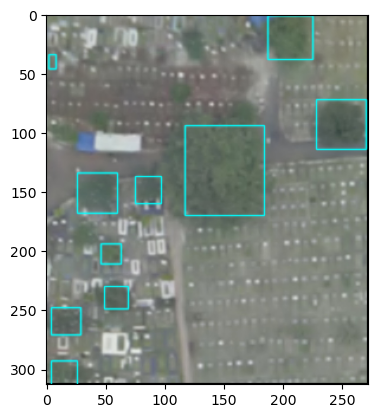

In [47]:
plt.imshow(img[:,:,::-1])

In [48]:
boxes = modelv2.predict_image(path="GBK9.tif", return_plot = False)

In [49]:
boxes.to_csv("GBK9.csv", index=False)

# End

In [48]:
from PIL import Image
from PIL import ImageDraw

In [49]:
img = Image.open(r'D:\David Wijaya\Dataset\tree-counting-3933.tif')

In [50]:
shownimg = img.copy()
img.close()

In [51]:
imdraw = ImageDraw.Draw(shownimg)

In [75]:
ground_truth

,image_path,xmin,ymin,xmax,ymax,label
0,tree-counting-3933.tif,89,220,104,235,Tree
1,tree-counting-3933.tif,76,206,91,221,Tree
2,tree-counting-3933.tif,14,116,32,135,Tree
3,tree-counting-3933.tif,0,156,13,178,Tree
4,tree-counting-3933.tif,10,145,31,167,Tree
5,tree-counting-3933.tif,23,168,41,187,Tree
6,tree-counting-3933.tif,2,178,22,197,Tree
7,tree-counting-3933.tif,32,184,52,204,Tree
8,tree-counting-3933.tif,106,173,121,189,Tree
9,tree-counting-3933.tif,49,242,67,256,Tree


In [63]:
x = []
for i in range (len(predictions)):
    listpredict = []
    mindatax = int(predictions[['xmin']].iloc[i].values[0])
    maxdatax = int(predictions[['xmax']].iloc[i].values[0])
    mindatay = int(predictions[['ymin']].iloc[i].values[0])
    maxdatay = int(predictions[['ymax']].iloc[i].values[0])
    
    listpredict.append(mindatax)
    listpredict.append(mindatay)
    listpredict.append(maxdatax)
    listpredict.append(maxdatay)
    
    x.append(listpredict)

In [73]:
for i in range (len(x)):
    imdraw.rectangle([x[i][0], x[i][1], x[i][2], x[i][3]], fill = None, outline = 'red')

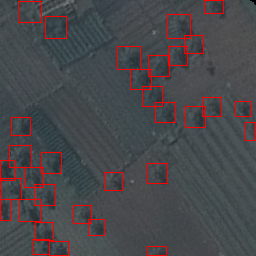

In [74]:
shownimg

In [80]:
imgopen = Image.open(r'D:\David Wijaya\Dataset\tree-counting-3933.tif')

In [82]:
showntruth = imgopen.copy()
imgopen.close()

In [83]:
imdrawTruth = ImageDraw.Draw(showntruth)

In [84]:
y = []
for i in range (len(ground_truth)):
    GTlistpredict = []
    GTmindatax = int(ground_truth[['xmin']].iloc[i].values[0])
    GTmaxdatax = int(ground_truth[['xmax']].iloc[i].values[0])
    GTmindatay = int(ground_truth[['ymin']].iloc[i].values[0])
    GTmaxdatay = int(ground_truth[['ymax']].iloc[i].values[0])
    
    listpredict.append(GTmindatax)
    listpredict.append(GTmindatay)
    listpredict.append(GTmaxdatax)
    listpredict.append(GTmaxdatay)
    
    y.append(GTlistpredict)

In [90]:
for i in range (len(y)):
    imdrawTruth.rectangle([x[i][0], x[i][1], x[i][2], x[i][3]], fill = None, outline = 'blue')

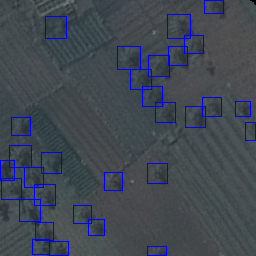

In [91]:
showntruth